# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

todays_date=datetime.datetime.today()
todays_date=todays_date.strftime('%m/%d/%Y')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url=f"{url}appid={api_key}&units={units}&q="

#Lists to hold response information

temperature=[]
humidity_percent=[]
cloudiness_percent=[]
wind_speed=[]
country=[]
date=[]
lat=[]
lng=[]
cities_found=[]        

print("Beginning Data Retrieval")
print("-----------------------------------")
rec_count=1
rec_set=1
rec_batch_size=50

for city in cities:
    response=requests.get(query_url+city).json()
    try:
        temperature.append(response["main"]["temp_max"])
        humidity_percent.append(response["main"]["humidity"])
        cloudiness_percent.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cities_found.append(city)
        
        #Setting up printing of data while it is being processed in batches of 50 for each set
        
        if rec_count<=rec_batch_size:
            print(f"Processing Record {rec_count} of Set {rec_set} | {city}")
            rec_count=rec_count+1
        elif rec_count>rec_batch_size:
            rec_set=rec_set+1
            rec_count=1
            print(f"Processing Record {rec_count} of Set {rec_set} | {city}")
        
        
    except:
        print("City not found...Skipping")


Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sabang
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | derzhavinsk
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | lebork
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | puerto carreno
Processing Record 16 of Set 1 | san clemente
Processing Record 17 of Set 1 | marawi
Processing Record 18 of Set 1 | dwarka
City not found...Skipping
Processing Record 19 of Set 1 | kholmy
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | adre
City not found...Skipping
City not found...Sk

Processing Record 38 of Set 4 | mitsamiouli
Processing Record 39 of Set 4 | matara
Processing Record 40 of Set 4 | statesboro
City not found...Skipping
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | silvassa
Processing Record 43 of Set 4 | jolalpan
Processing Record 44 of Set 4 | dombarovskiy
Processing Record 45 of Set 4 | nynashamn
Processing Record 46 of Set 4 | bambanglipuro
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | campos altos
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | antsohihy
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | quang ngai
City not found...Skipping
Processing Record 3 of Set 5 | arlit
City not found...Skipping
Processing Record 4 of Set 5 | arraial do cabo
City not found...Skipping
Processing Record 5 of Set 5 | lodja
Processing Record 6 of Set 5 | yenagoa
Processing Record 7 of Set 5 | ginir
Processing Record 8 of Se

Processing Record 21 of Set 8 | sorong
Processing Record 22 of Set 8 | catuday
City not found...Skipping
Processing Record 23 of Set 8 | leningradskiy
Processing Record 24 of Set 8 | kendari
Processing Record 25 of Set 8 | san
Processing Record 26 of Set 8 | burnie
Processing Record 27 of Set 8 | oistins
Processing Record 28 of Set 8 | galle
Processing Record 29 of Set 8 | constantine
Processing Record 30 of Set 8 | ulkan
Processing Record 31 of Set 8 | mahebourg
Processing Record 32 of Set 8 | kosh-agach
City not found...Skipping
Processing Record 33 of Set 8 | freistadt
Processing Record 34 of Set 8 | srednekolymsk
Processing Record 35 of Set 8 | vila
Processing Record 36 of Set 8 | ereymentau
City not found...Skipping
City not found...Skipping
Processing Record 37 of Set 8 | rio grande
Processing Record 38 of Set 8 | progreso
Processing Record 39 of Set 8 | tornio
Processing Record 40 of Set 8 | mauldin
Processing Record 41 of Set 8 | shihezi
Processing Record 42 of Set 8 | hegang
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe

cities_weather={"City":cities_found, "Cloudiness":cloudiness_percent, "Country":country, "Date":date,"Humidity":humidity_percent, "Lat":lat,"Lng":lng, "Max Temp":temperature, "Wind Speed":wind_speed}
cities_weather=pd.DataFrame(cities_weather)

#Convert temperature from Celsius to Fahrenheit

cities_weather["Max Temp"]=(cities_weather["Max Temp"]*9/5)+32

#Prepare to export file to csv file

cities_csv=cities_weather
cities_csv=cities_csv.to_csv('cities.csv',index=False, header=True)


In [5]:
cities_weather.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [6]:
#Preview of dataframe

cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambous virieux,40,MU,1571768241,88,-20.34,57.76,73.994,1.50
1,ushuaia,75,AR,1571768241,41,-54.81,-68.31,57.200,6.70
2,busselton,6,AU,1571768241,71,-33.64,115.35,55.004,4.38
3,sabang,38,PH,1571768241,93,13.80,121.11,75.992,1.40
4,port alfred,91,ZA,1571768119,75,-33.59,26.89,62.006,4.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

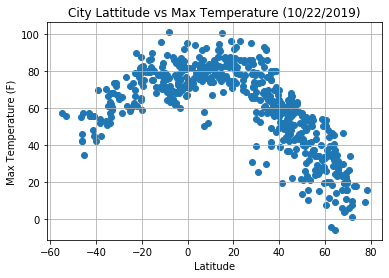

In [16]:
plt.scatter(cities_weather["Lat"], cities_weather["Max Temp"], marker="o")
plt.title(f"City Lattitude vs Max Temperature ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("City Lattitude vs Max Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

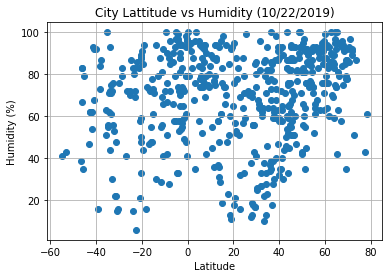

In [17]:
plt.scatter(cities_weather["Lat"], cities_weather["Humidity"], marker="o")
plt.title(f"City Lattitude vs Humidity ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("City Lattitude vs Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

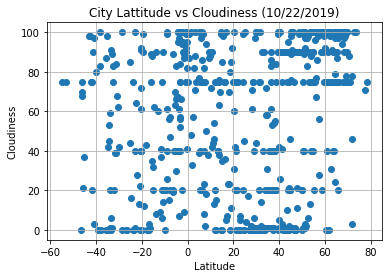

In [18]:
plt.scatter(cities_weather["Lat"], cities_weather["Cloudiness"], marker="o")
plt.title(f"City Lattitude vs Cloudiness ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("City Lattitude vs Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

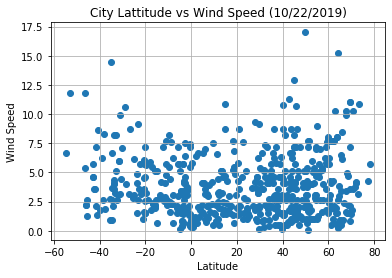

In [19]:
plt.scatter(cities_weather["Lat"], cities_weather["Wind Speed"], marker="o")
plt.title(f"City Lattitude vs Wind Speed ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("City Lattitude vs Wind Speed.png")

plt.show()